In [ ]:
Stock Analysis Returns

In [4]:
# Library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [10]:
import yfinance as yf

In [11]:
start = '2016-01-01'
end = '2019-01-01'

market = 'SPY'
symbol1 = 'AAPL'
symbol2 = 'MSFT'
symbol3 = 'AMD'
symbol4 = 'INTC'
bench = yf.download(market, start=start, end=end)
stock1 = yf.download(symbol1, start=start, end=end)
stock2 = yf.download(symbol2, start=start, end=end)
stock3 = yf.download(symbol3, start=start, end=end)
stock4 = yf.download(symbol4, start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Calculate Daily Gain

In [13]:
#Daily gain for the stock
stock1["Gain"]=(stock1["Adj Close"].pct_change())*100
stock2["Gain"]=(stock2["Adj Close"].pct_change())*100
stock3["Gain"]=(stock3["Adj Close"].pct_change())*100
stock4["Gain"]=(stock4["Adj Close"].pct_change())*100

# Calculate the Mean and Variances of Daily Gains

In [14]:
print('Stock '+ symbol1 + ' Mean:', stock1["Gain"].mean())
print('Stock '+ symbol1 + ' Variances:', stock1["Gain"].var())

Stock AAPL Mean: 0.07176158529513449
Stock AAPL Variances: 2.2250643613800016


In [15]:
print('Stock '+ symbol2 + ' Mean:', stock2["Gain"].mean())
print('Stock '+ symbol2 + ' Variances:', stock2["Gain"].var())

Stock MSFT Mean: 0.1008895346734777
Stock MSFT Variances: 2.0235982677263147


In [16]:
print('Stock '+ symbol3 + ' Mean:', stock3["Gain"].mean())
print('Stock '+ symbol3 + ' Variances:', stock3["Gain"].var())

Stock AMD Mean: 0.3445908776318635
Stock AMD Variances: 19.33307951072237


In [17]:
print('Stock '+ symbol4 + ' Mean:', stock4["Gain"].mean())
print('Stock '+ symbol4 + ' Variances:', stock4["Gain"].var())

Stock INTC Mean: 0.06706427931356042
Stock INTC Variances: 2.5783492235770713


# Highest volatality and draw the histogram distribution of daily returns for all the stock

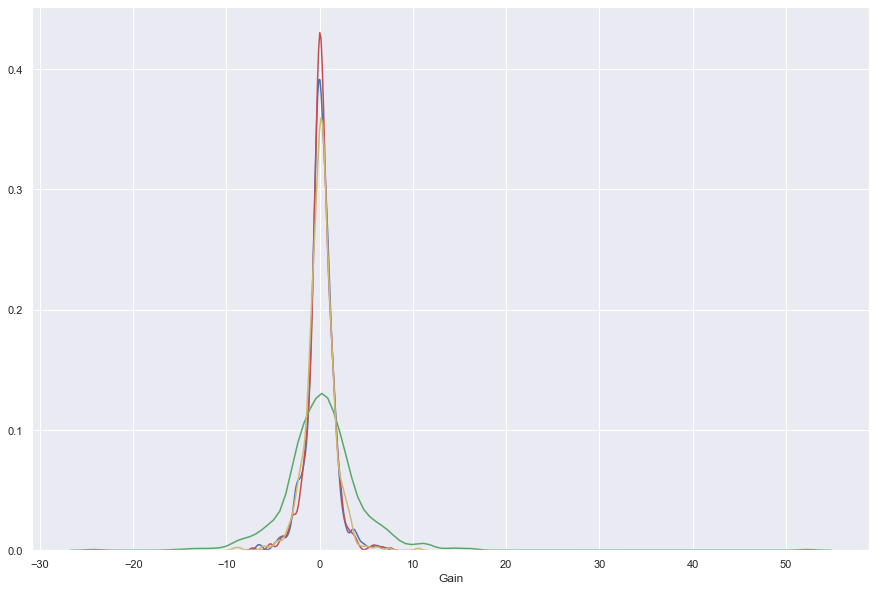

In [18]:
sns.set(rc={"figure.figsize": (15, 10)});
sns.distplot(stock1['Gain'], hist = False, color = 'b' )
sns.distplot(stock2['Gain'], hist = False, color = 'r' )
sns.distplot(stock3['Gain'], hist = False, color = 'g' )
sns.distplot(stock4['Gain'], hist = False, color = 'y' )

# Correlation

In [19]:
All_Stocks = pd.concat([stock1['Gain'],stock2['Gain'],stock3['Gain'],stock4['Gain']], axis=1)

In [20]:
names = ['AAPL', 'MSFT', 'AMD', 'INTC']
All_Stocks.columns = names

In [21]:
All_Stocks = All_Stocks.dropna()
All_Stocks

,AAPL,MSFT,AMD,INTC
Date,,,,
2016-01-05,-2.505933,0.456207,-0.722021,-0.470735
2016-01-06,-1.956980,-1.816532,-8.727273,-2.216967
2016-01-07,-4.220462,-3.478255,-9.163347,-3.748486
2016-01-08,0.528809,0.306687,-6.140345,-1.036434
2016-01-11,1.619189,-0.057341,9.345785,1.745486
...,...,...,...,...
2018-12-24,-2.587408,-4.173871,-1.653873,-2.787694
2018-12-26,7.042166,6.830978,7.507508,5.964655
2018-12-27,-0.648995,0.616546,-2.290502,0.368064


In [22]:
All_Stocks.corr()

,AAPL,MSFT,AMD,INTC
AAPL,1.000000,0.587342,0.270291,0.479346
MSFT,0.587342,1.000000,0.200653,0.603708
AMD,0.270291,0.200653,1.000000,0.264618
INTC,0.479346,0.603708,0.264618,1.000000


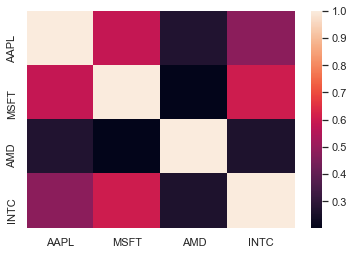

In [23]:
#Heat map
sns.set(rc={"figure.figsize": (6, 4)});
sns.heatmap( All_Stocks.corr())